GBM Uygulama

In [ ]:
df = pd.red

In [27]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)

In [6]:
gbm_model = GradientBoostingClassifier(random_state=17)

In [7]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 17,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [10]:
cv_results = cross_validate(gbm_model,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])

In [11]:
cv_results['test_accuracy'].mean()

0.7591715474068416

In [12]:
cv_results['test_f1'].mean()

0.634235802826363

In [13]:
cv_results['test_roc_auc'].mean()

0.8254867225716283

In [15]:
gbm_params= {"learning_rate":[0.01,0.1],
             "max_depth": [3,8,10],
             "n_estimators":[100,500,1000],
             "subsample":[1,0.5,0.7]}

In [18]:
gbm_best_grid = GridSearchCV(gbm_model,gbm_params,cv=5,n_jobs=-1,verbose=True).fit(X,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [19]:
gbm_best_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.5}

In [21]:
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_,random_state=17).fit(X,y)

In [22]:
cv_results = cross_validate(gbm_final,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])

In [23]:
cv_results["test_accuracy"].mean()

0.7800186741363212

In [24]:
cv_results["test_f1"].mean()

0.668605747317776

In [25]:
cv_results["test_roc_auc"].mean()

0.8257784765897973

In [30]:
# Feature Importance bölümü

In [28]:
# Değişkenlerin önemi. 

def plot_importance(model,features,num=len(X),save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_,"Feature": features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    
    if save:
        plt.savefig("importances.png")

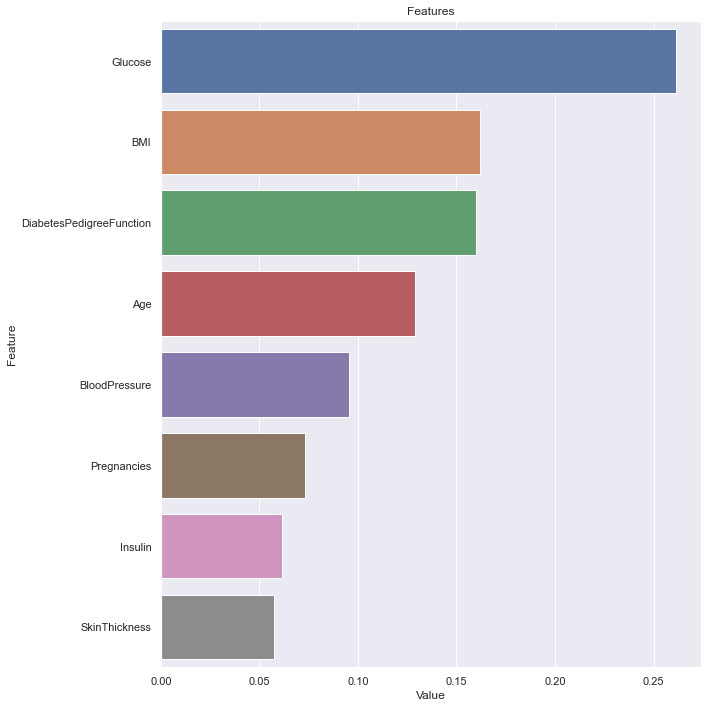

In [29]:
plot_importance(gbm_final,X)